In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [10]:
df= pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [11]:
dummy= pd.get_dummies(df['Car Model'], dtype=int)
df_new=pd.concat([df, dummy], axis='columns')
df_new.drop(columns=["Car Model","Audi A5"], inplace=True)
X= df_new.drop(columns="Sell Price($)")
X_train, X_test, y_train, y_test= train_test_split(X, df['Sell Price($)'], test_size=0.3, random_state=42)

In [12]:
model= linear_model.LogisticRegression()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

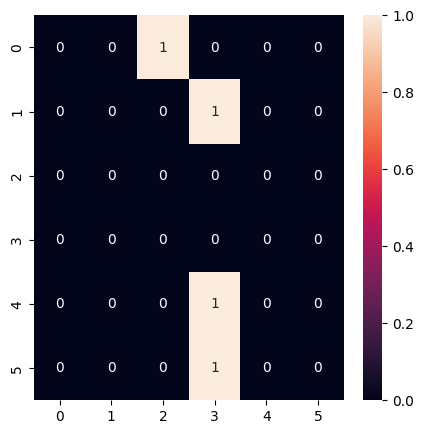

In [13]:
y_pred= model.predict(X_test)
model.score(X_test, y_pred)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.show()